In [1]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.irf import IRAnalysis
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats

In [2]:
# Read data from a CSV file with labels
salesdata = "https://raw.githubusercontent.com/quruis/ECO1960/main/1960%20data.csv" 
df = pd.read_csv(salesdata)

# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Date' column to datetime format if it's not already
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Pump_price,Fed_car_tax,GST_HST,Ret_sales,GDP,LFP,Car_Sales,Wages
0,2017-01-01,111.5,0.0,12.8,8071889,1964009,2470188,46261,6256584
1,2017-02-01,107.6,0.0,12.4,8151735,1970851,2474779,52347,6284840
2,2017-03-01,106.9,0.0,12.3,8251571,1979281,2479370,77551,6295532
3,2017-04-01,115.3,0.0,13.3,8430747,1988478,2483961,82527,6297280
4,2017-05-01,112.4,0.0,12.9,8374712,1992334,2488553,93022,6308896


In [3]:
df.describe()

,Pump_price,Fed_car_tax,GST_HST,Ret_sales,GDP,LFP,Car_Sales,Wages
count,84.000000,84.000000,84.000000,8.400000e+01,8.400000e+01,8.400000e+01,84.000000,8.400000e+01
mean,129.992857,5.946429,14.955952,9.583923e+06,2.087001e+06,2.649368e+06,62469.000000,6.508055e+06
std,24.775468,4.949150,2.848519,1.219908e+06,8.911683e+04,9.277111e+04,14626.269616,3.420259e+05
min,79.800000,0.000000,9.200000,6.022345e+06,1.758397e+06,2.470188e+06,16393.000000,5.279650e+06
25%,112.100000,0.000000,12.875000,8.637108e+06,2.032491e+06,2.576977e+06,52519.500000,6.334984e+06
50%,125.550000,6.600000,14.400000,9.181413e+06,2.083294e+06,2.662008e+06,62847.000000,6.547048e+06
75%,145.125000,9.375000,16.725000,1.101375e+07,2.173110e+06,2.728388e+06,72767.750000,6.704790e+06
max,207.200000,14.300000,23.800000,1.196339e+07,2.212330e+06,2.787786e+06,93022.000000,7.022105e+06


In [4]:
# Convert all columns except 'Date' to numeric
numeric_cols = df.columns[df.columns != 'Date']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
print(df.dtypes)

Date           datetime64[ns]
Pump_price            float64
Fed_car_tax           float64
GST_HST               float64
Ret_sales               int64
GDP                     int64
LFP                     int64
Car_Sales               int64
Wages                   int64
dtype: object


In [5]:
print(df.isnull().sum())

Date           0
Pump_price     0
Fed_car_tax    0
GST_HST        0
Ret_sales      0
GDP            0
LFP            0
Car_Sales      0
Wages          0
dtype: int64


In [6]:
# Filter data up to April 1, 2020
df = df[df['Date'] <= '2020-02-01']

# Display the filtered DataFrame
print(df)

         Date  Pump_price  Fed_car_tax  GST_HST  Ret_sales      GDP      LFP  \
0  2017-01-01       111.5          0.0     12.8    8071889  1964009  2470188   
1  2017-02-01       107.6          0.0     12.4    8151735  1970851  2474779   
2  2017-03-01       106.9          0.0     12.3    8251571  1979281  2479370   
3  2017-04-01       115.3          0.0     13.3    8430747  1988478  2483961   
4  2017-05-01       112.4          0.0     12.9    8374712  1992334  2488553   
5  2017-06-01       107.4          0.0     12.4    8223990  1996718  2493144   
6  2017-07-01       109.9          0.0     12.6    8272201  1995462  2497735   
7  2017-08-01       112.3          0.0     12.9    8529984  1993294  2503335   
8  2017-09-01       118.8          0.0     13.7    8367993  1998202  2508935   
9  2017-10-01       115.1          0.0     13.2    8536718  1998437  2514535   
10 2017-11-01       122.3          0.0     14.1    8554292  2007905  2520134   
11 2017-12-01       120.9          0.0  

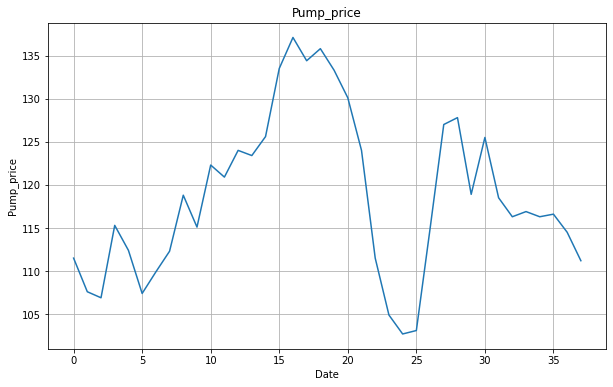

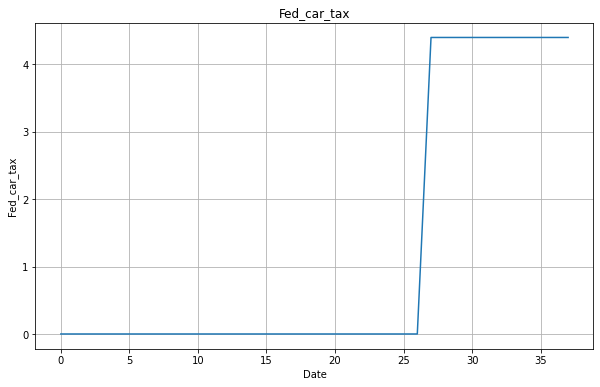

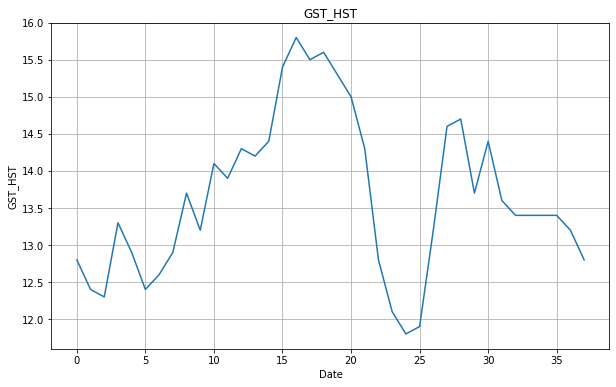

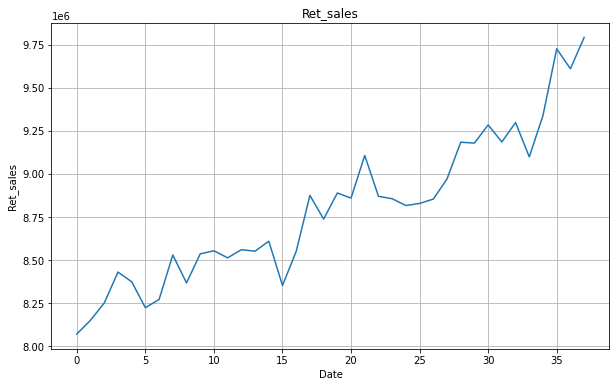

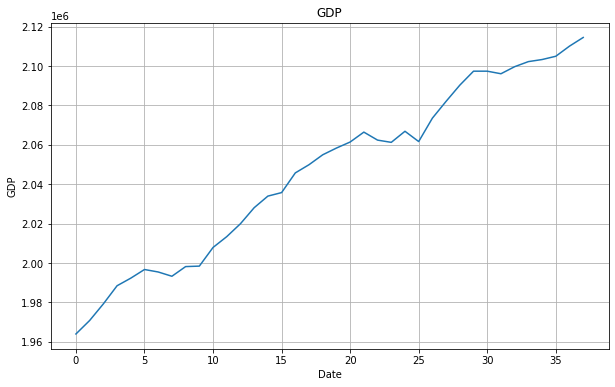

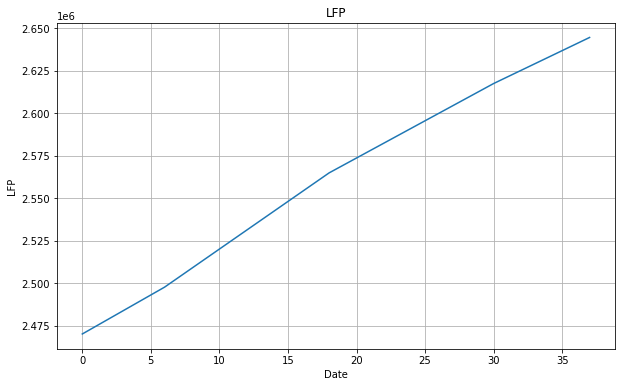

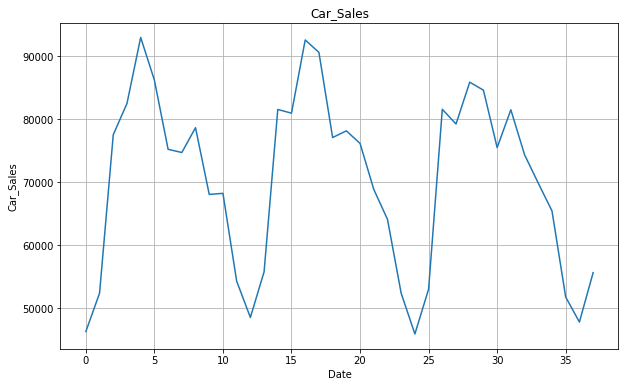

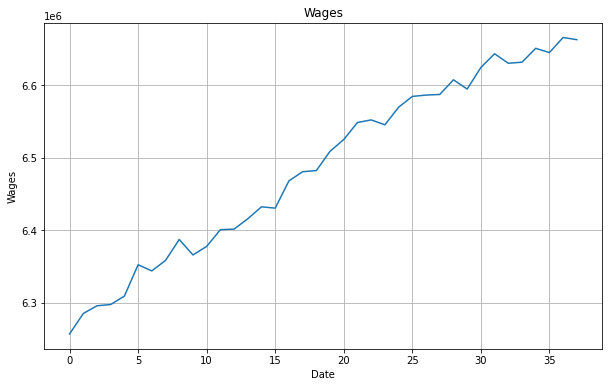

In [7]:
# Set the directory path to save the images
save_path = "C:/Users/Sheva/Desktop/Images/"

for column in df.columns[1:]:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[column])
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid(True)
    plt.savefig(save_path + f"{column}.png")  # Save the plot to the specified location
    plt.show()  # Display the plot inline
    plt.close()
    
    
    

In [8]:
# Check stationarity for each series
for column in df.columns[1:]:
    series = df[column]
    
    # Method 1: ADF Test
    result = adfuller(series)
    print(f'ADF Statistic for {column}: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

ADF Statistic for Pump_price: -2.450800547829428
p-value: 0.12790841671640363
Critical Values:
	1%: -3.626651907578875
	5%: -2.9459512825788754
	10%: -2.6116707716049383
ADF Statistic for Fed_car_tax: -0.6031793794762581
p-value: 0.8702619977678794
Critical Values:
	1%: -3.6209175221605827
	5%: -2.9435394610388332
	10%: -2.6104002410518627
ADF Statistic for GST_HST: -2.4127629365309753
p-value: 0.13816651914254713
Critical Values:
	1%: -3.626651907578875
	5%: -2.9459512825788754
	10%: -2.6116707716049383
ADF Statistic for Ret_sales: 1.0297497585133515
p-value: 0.9945701333323308
Critical Values:
	1%: -3.661428725118324
	5%: -2.960525341210433
	10%: -2.6193188033298647
ADF Statistic for GDP: -1.3773606284336617
p-value: 0.5930803157526512
Critical Values:
	1%: -3.6209175221605827
	5%: -2.9435394610388332
	10%: -2.6104002410518627
ADF Statistic for LFP: -2.2665994044588085
p-value: 0.18296665257538225
Critical Values:
	1%: -3.626651907578875
	5%: -2.9459512825788754
	10%: -2.611670771604

In [9]:
df.head()

,Date,Pump_price,Fed_car_tax,GST_HST,Ret_sales,GDP,LFP,Car_Sales,Wages
0,2017-01-01,111.5,0.0,12.8,8071889,1964009,2470188,46261,6256584
1,2017-02-01,107.6,0.0,12.4,8151735,1970851,2474779,52347,6284840
2,2017-03-01,106.9,0.0,12.3,8251571,1979281,2479370,77551,6295532
3,2017-04-01,115.3,0.0,13.3,8430747,1988478,2483961,82527,6297280
4,2017-05-01,112.4,0.0,12.9,8374712,1992334,2488553,93022,6308896


In [10]:
# Check stationarity for each series
for column in df.columns[1:]:
    series = df[column]
    
    # Method 1: ADF Test
    result = adfuller(series)
    print(f'ADF Statistic for {column}: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

ADF Statistic for Pump_price: -2.450800547829428
p-value: 0.12790841671640363
Critical Values:
	1%: -3.626651907578875
	5%: -2.9459512825788754
	10%: -2.6116707716049383
ADF Statistic for Fed_car_tax: -0.6031793794762581
p-value: 0.8702619977678794
Critical Values:
	1%: -3.6209175221605827
	5%: -2.9435394610388332
	10%: -2.6104002410518627
ADF Statistic for GST_HST: -2.4127629365309753
p-value: 0.13816651914254713
Critical Values:
	1%: -3.626651907578875
	5%: -2.9459512825788754
	10%: -2.6116707716049383
ADF Statistic for Ret_sales: 1.0297497585133515
p-value: 0.9945701333323308
Critical Values:
	1%: -3.661428725118324
	5%: -2.960525341210433
	10%: -2.6193188033298647
ADF Statistic for GDP: -1.3773606284336617
p-value: 0.5930803157526512
Critical Values:
	1%: -3.6209175221605827
	5%: -2.9435394610388332
	10%: -2.6104002410518627
ADF Statistic for LFP: -2.2665994044588085
p-value: 0.18296665257538225
Critical Values:
	1%: -3.626651907578875
	5%: -2.9459512825788754
	10%: -2.611670771604

In [11]:
# Fit ARIMA model without 'Fed_car_tax'
model_without_tax = ARIMA(df['Ret_sales'], order=(1, 1, 1), exog=df[['Pump_price', 'GST_HST', 'GDP', 'LFP', 'Car_Sales', 'Wages']])
results_without_tax = model_without_tax.fit()

# Summary of the model without 'Fed_car_tax'
print(results_without_tax.summary())


                               SARIMAX Results                                
Dep. Variable:              Ret_sales   No. Observations:                   38
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -494.115
Date:                Sun, 07 Apr 2024   AIC                           1006.230
Time:                        13:54:14   BIC                           1020.729
Sample:                             0   HQIC                          1011.342
                                 - 38                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pump_price  1.385e+04   6.83e+04      0.203      0.839    -1.2e+05    1.48e+05
GST_HST    -1.099e+05   5.66e+05     -0.194      0.846   -1.22e+06       1e+06
GDP            5.6068      8.433      0.665      0.5

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model with all variables
model_with_all = ARIMA(df['Ret_sales'], order=(1, 1, 1), exog=df[['Pump_price', 'Fed_car_tax', 'GST_HST', 'GDP', 'LFP', 'Car_Sales', 'Wages']])
results_with_all = model_with_all.fit()

# Summary of the model with all variables
print(results_with_all.summary())


                               SARIMAX Results                                
Dep. Variable:              Ret_sales   No. Observations:                   38
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -492.075
Date:                Sun, 07 Apr 2024   AIC                           1004.149
Time:                        13:54:14   BIC                           1020.258
Sample:                             0   HQIC                          1009.828
                                 - 38                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Pump_price    1.36e+04   9.55e+04      0.142      0.887   -1.74e+05    2.01e+05
Fed_car_tax  8146.7857   7.43e+04      0.110      0.913   -1.37e+05    1.54e+05
GST_HST      -1.11e+05   8.12e+05     -0.137    

C:\Users\Sheva\anaconda3.1\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create binary treatment variable indicating periods after tax implementation
tax_implemented_date = pd.to_datetime('2019-04-01')  # Convert tax implementation date to datetime
df['Post_tax'] = (df['Date'] > tax_implemented_date)

# Create binary treatment variable indicating treated group
df['Treated'] = (df['Fed_car_tax'] > 0)

# Create interaction term between 'Post_tax' and 'Treated'
df['Post_tax_Treated'] = df['Post_tax'] * df['Treated']

# Convert boolean columns to integers
df['Post_tax'] = df['Post_tax'].astype(int)
df['Treated'] = df['Treated'].astype(int)
df['Post_tax_Treated'] = df['Post_tax_Treated'].astype(int)

# Specify independent variables (control variables)
X = df[['Pump_price', 'GST_HST', 'GDP', 'LFP', 'Post_tax', 'Treated', 'Post_tax_Treated']]

# Add constant term
X = sm.add_constant(X)

# Specify dependent variable
y = df['Ret_sales']

# Fit Difference-in-Differences model
model = sm.OLS(y, X).fit()

# Print summary of regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Ret_sales   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     47.53
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           2.77e-14
Time:                        13:54:14   Log-Likelihood:                -502.69
No. Observations:                  38   AIC:                             1019.
Df Residuals:                      31   BIC:                             1031.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.896e+06    1.8e+06  

C:\Users\Sheva\anaconda3.1\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


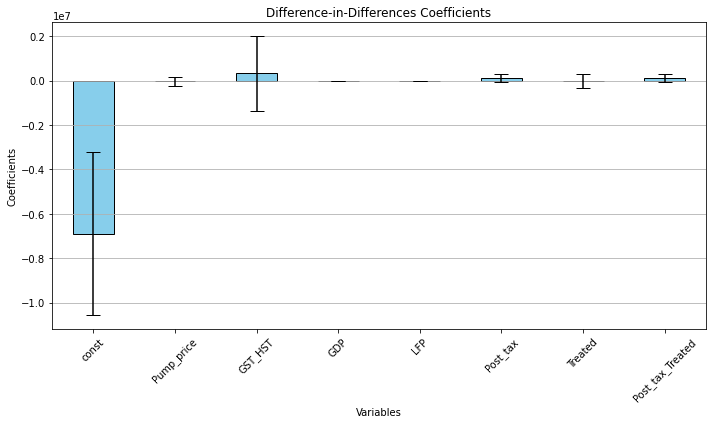

In [14]:
# Extract coefficients and confidence intervals from the model summary
coef = model.params
conf_int = model.conf_int()

# Plot coefficients
plt.figure(figsize=(10, 6))
coef.plot(kind='bar', yerr=(coef - conf_int[0], conf_int[1] - coef), color='skyblue', edgecolor='black', capsize=7)
plt.title('Difference-in-Differences Coefficients')
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

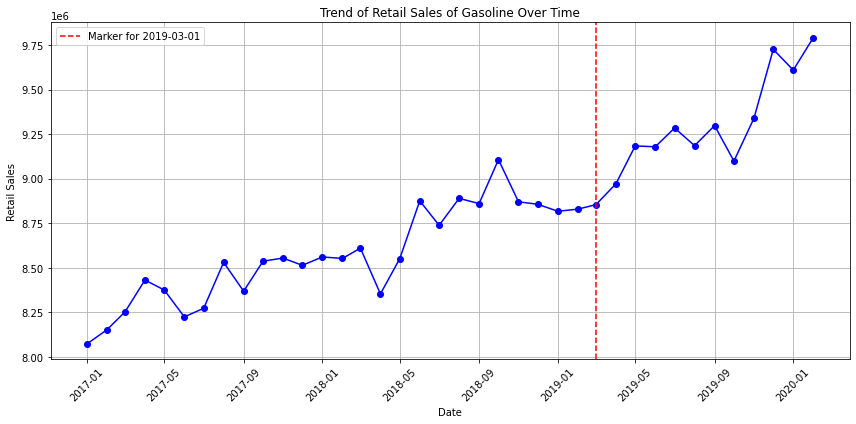

In [15]:
# Plotting the trend over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Ret_sales'], marker='o', linestyle='-', color='b')
plt.title('Trend of Retail Sales of Gasoline Over Time')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.grid(True)
plt.xticks(rotation=45)

# Convert marker date to datetime object
marker_date = pd.to_datetime('2019-03-01')

# Adding a vertical line marker for 2019-03-01
plt.axvline(x=marker_date, color='r', linestyle='--', linewidth=1.5, label='Marker for 2019-03-01')

plt.legend()
plt.tight_layout()
plt.savefig(save_path + f"{column}.png")  # Save the plot to the specified location
plt.show()  # Display the plot inline
plt.close()

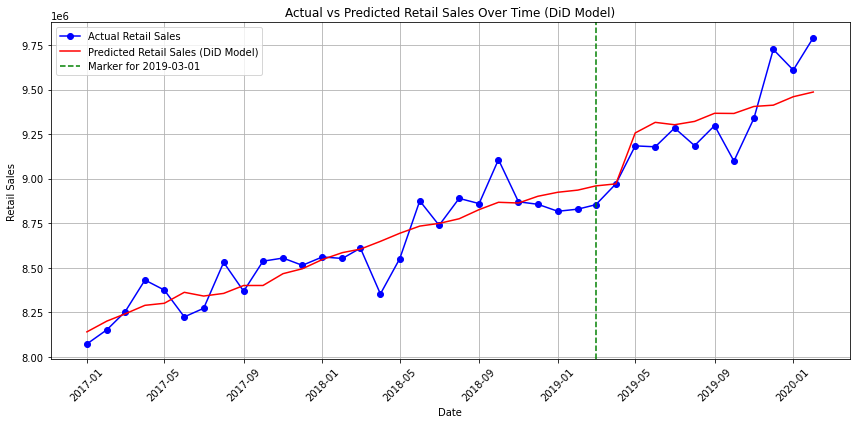

In [16]:
# Plotting the actual retail sales over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Ret_sales'], marker='o', linestyle='-', color='b', label='Actual Retail Sales')

# Overlaying with the predicted values from the DiD model
plt.plot(df['Date'], model.predict(X), marker='', linestyle='-', color='r', label='Predicted Retail Sales (DiD Model)')

# Adding vertical line markers for specific dates
marker_date_1 = pd.to_datetime('2019-03-01')

plt.axvline(x=marker_date_1, color='g', linestyle='--', linewidth=1.5, label='Marker for 2019-03-01')

plt.title('Actual vs Predicted Retail Sales Over Time (DiD Model)')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Sheva\anaconda3.1\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:              Ret_sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     48.26
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           2.25e-14
Time:                        13:54:15   Log-Likelihood:                -502.44
No. Observations:                  38   AIC:                             1019.
Df Residuals:                      31   BIC:                             1030.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5.896e+06   1.97e+0

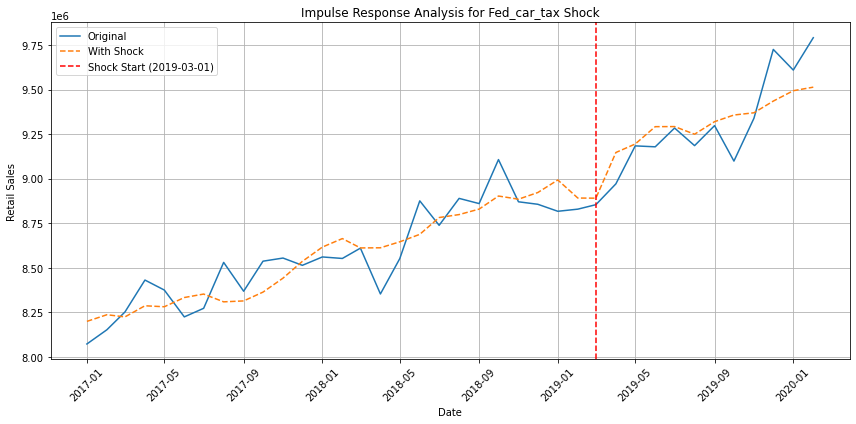

In [17]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Simulate a shock to 'Fed_car_tax'
shock_magnitude = 0  # Adjust the shock magnitude as needed
df['Fed_car_tax_shock'] = df['Fed_car_tax'] + shock_magnitude  # Adding a constant magnitude to 'Fed_car_tax'

# Specify independent variables (control variables) including the shock variable
X_shock = df[['GDP', 'LFP', 'Pump_price', 'Car_Sales', 'Wages', 'Fed_car_tax_shock']]
X_shock = sm.add_constant(X_shock)

# Specify dependent variable
y = df['Ret_sales']

# Re-estimate the OLS model with the shock
model_shock = sm.OLS(y, X_shock).fit()

# Print summary of regression results with the shock
print(model_shock.summary())

# Plot the impulse response
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], y, label='Original')
plt.plot(df['Date'], model_shock.predict(X_shock), label='With Shock', linestyle='--')
plt.axvline(x=pd.to_datetime('2019-03-01'), color='r', linestyle='--', linewidth=1.5, label='Shock Start (2019-03-01)')
plt.title('Impulse Response Analysis for Fed_car_tax Shock')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

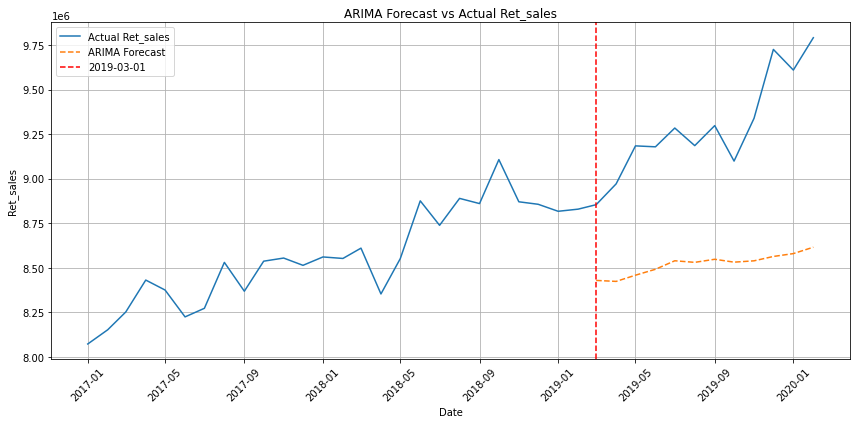

In [18]:
# Filter data before 2019-03-01
filtered_df = df[df['Date'] < '2019-03-01']

# Specify the independent variable (control variables) for ARIMA model
X_arima = filtered_df[['Pump_price', 'GST_HST', 'GDP', 'LFP']]

# Specify the dependent variable for ARIMA model
y_arima = filtered_df['Ret_sales']

# Fit ARIMA model
arima_model = ARIMA(y_arima, exog=X_arima, order=(5,1,0))  # Example order, you can adjust it
arima_result = arima_model.fit()

# Make predictions using ARIMA model
arima_forecast = arima_result.forecast(steps=len(df) - len(filtered_df), exog=df[['Pump_price', 'GST_HST', 'GDP', 'LFP']][:len(df) - len(filtered_df)])

# Create a DataFrame for the forecasted values with corresponding dates
forecast_dates = pd.date_range(start=filtered_df['Date'].iloc[-1], periods=len(df) - len(filtered_df) + 1, freq='MS')[1:]
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Ret_sales_forecast': arima_forecast})

# Plot actual Ret_sales and ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Ret_sales'], label='Actual Ret_sales')
plt.plot(forecast_df['Date'], forecast_df['Ret_sales_forecast'], label='ARIMA Forecast', linestyle='--')
plt.axvline(x=pd.to_datetime('2019-03-01'), color='r', linestyle='--', linewidth=1.5, label='2019-03-01')
plt.title('ARIMA Forecast vs Actual Ret_sales')
plt.xlabel('Date')
plt.ylabel('Ret_sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

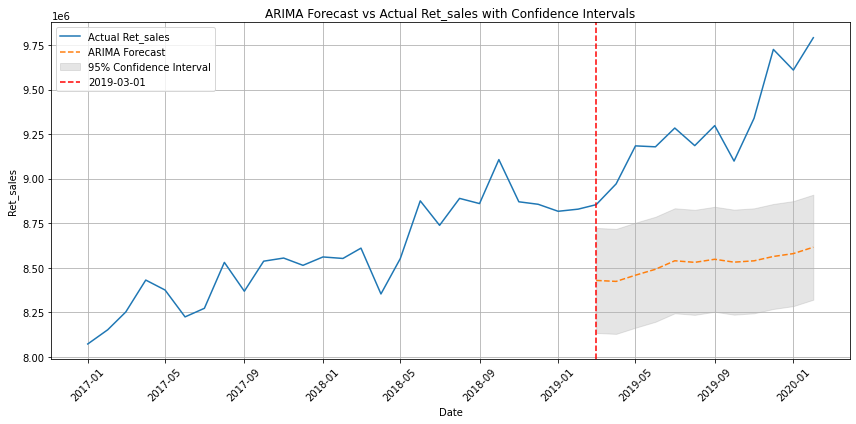

In [19]:
# Filter data before 2019-03-01
filtered_df = df[df['Date'] < '2019-03-01']

# Specify the independent variable (control variables) for ARIMA model
X_arima = filtered_df[['Pump_price', 'Fed_car_tax', 'GST_HST', 'GDP', 'LFP']]

# Specify the dependent variable for ARIMA model
y_arima = filtered_df['Ret_sales']

# Fit ARIMA model
arima_model = ARIMA(y_arima, exog=X_arima, order=(5,1,0))  # Example order, you can adjust it
arima_result = arima_model.fit()

# Make predictions using ARIMA model
arima_forecast = arima_result.forecast(steps=len(df) - len(filtered_df), exog=df[['Pump_price', 'Fed_car_tax', 'GST_HST', 'GDP', 'LFP']][:len(df) - len(filtered_df)])

# Plot actual Ret_sales and ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Ret_sales'], label='Actual Ret_sales')
plt.plot(df['Date'][len(filtered_df):], arima_forecast, label='ARIMA Forecast', linestyle='--')

# Calculate standard errors of the residuals
residuals = arima_result.resid
stderr = np.std(residuals)

# Calculate confidence interval based on standard error
alpha = 0.05  # Significance level
z_score = stats.norm.ppf(1 - alpha / 2)  # Z-score for two-tailed test
conf_int = np.column_stack((arima_forecast - z_score * stderr, arima_forecast + z_score * stderr))

# Plot confidence intervals
plt.fill_between(df['Date'][len(filtered_df):], conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='95% Confidence Interval')

plt.axvline(x=pd.to_datetime('2019-03-01'), color='r', linestyle='--', linewidth=1.5, label='2019-03-01')
plt.title('ARIMA Forecast vs Actual Ret_sales with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Ret_sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Paired t-test results:
T-statistic: 3.068221398196441
P-value: 0.010693821007645566
The difference between the actual and predicted values is statistically significant.


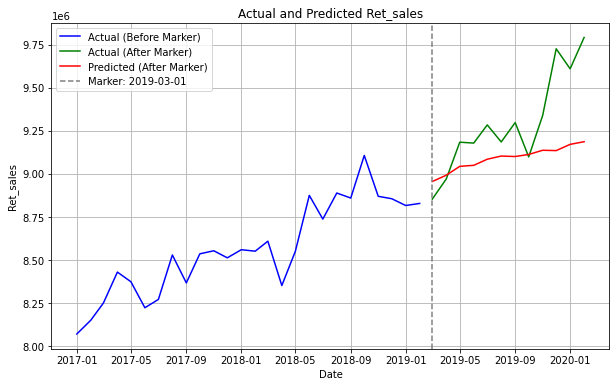

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Load the data
# Assuming 'df' is already loaded with the provided data

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Define the date marker
date_marker = '2019-03-01'

# Subset the data for training the model
df_train = df[df['Date'] < date_marker]

# Subset the data for predicting after the marker
df_predict = df[df['Date'] >= date_marker]

# Split data into features and target variable for training
X_train = df_train[['Pump_price', 'Fed_car_tax', 'GST_HST', 'GDP', 'LFP', 'Car_Sales', 'Wages']]
y_train = df_train['Ret_sales']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train Ridge regression model
alpha = 1  # Regularization strength
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_scaled, y_train)

# Split data into features and target variable for prediction
X_predict = df_predict[['Pump_price', 'Fed_car_tax', 'GST_HST', 'GDP', 'LFP', 'Car_Sales', 'Wages']]
y_actual = df_predict['Ret_sales']

# Standardize features for prediction
X_predict_scaled = scaler.transform(X_predict)

# Make predictions on data after the marker
y_predict = ridge.predict(X_predict_scaled)

# Perform paired t-test
t_statistic, p_value = ttest_rel(y_actual, y_predict)

# Print the results
print("Paired t-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The difference between the actual and predicted values is statistically significant.")
else:
    print("The difference between the actual and predicted values is not statistically significant.")

# Plot actual data before and after marker, and predicted values after marker
plt.figure(figsize=(10, 6))
plt.plot(df_train['Date'], df_train['Ret_sales'], color='blue', label='Actual (Before Marker)')
plt.plot(df_predict['Date'], y_actual, color='green', label='Actual (After Marker)')
plt.plot(df_predict['Date'], y_predict, color='red', label='Predicted (After Marker)')
plt.axvline(x=pd.to_datetime(date_marker), color='gray', linestyle='--', label='Marker: ' + date_marker)
plt.title('Actual and Predicted Ret_sales')
plt.xlabel('Date')
plt.ylabel('Ret_sales')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# Calculate relative error (percentage error)
relative_error = abs(y_actual - y_predict) / y_actual * 100

# Print the maximum, minimum, and average relative error
max_relative_error = relative_error.max()
min_relative_error = relative_error.min()
avg_relative_error = relative_error.mean()

print("Relative Error (Percentage Error):")
print(f"Maximum Relative Error: {max_relative_error:.2f}%")
print(f"Minimum Relative Error: {min_relative_error:.2f}%")
print(f"Average Relative Error: {avg_relative_error:.2f}%")

Relative Error (Percentage Error):
Maximum Relative Error: 6.17%
Minimum Relative Error: 0.16%
Average Relative Error: 2.38%


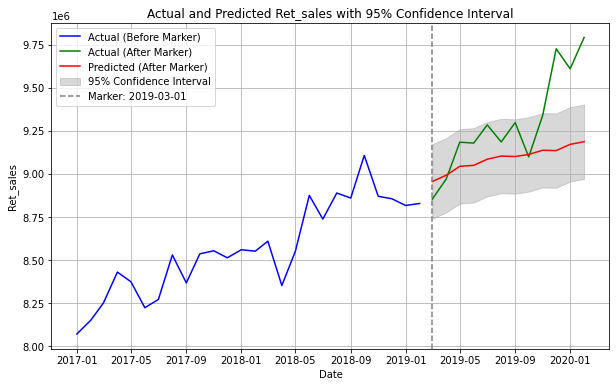

In [22]:
import numpy as np

# Calculate standard error of the regression estimates
residuals = y_actual - y_predict
degrees_of_freedom = len(y_actual) - X_predict.shape[1] - 1
standard_error = np.std(residuals) / np.sqrt(degrees_of_freedom)

# Calculate the 95% confidence interval for predicted values
confidence_interval = 1.96 * standard_error  # 1.96 is the z-value for a 95% confidence interval

# Plot actual data before and after marker, and predicted values after marker
plt.figure(figsize=(10, 6))
plt.plot(df_train['Date'], df_train['Ret_sales'], color='blue', label='Actual (Before Marker)')
plt.plot(df_predict['Date'], y_actual, color='green', label='Actual (After Marker)')
plt.plot(df_predict['Date'], y_predict, color='red', label='Predicted (After Marker)')
plt.fill_between(df_predict['Date'], y_predict - confidence_interval, y_predict + confidence_interval, color='gray', alpha=0.3, label='95% Confidence Interval')
plt.axvline(x=pd.to_datetime(date_marker), color='gray', linestyle='--', label='Marker: ' + date_marker)
plt.title('Actual and Predicted Ret_sales with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Ret_sales')
plt.legend()
plt.grid(True)
plt.savefig(save_path + f"{column}.png")  # Save the plot to the specified location
plt.show()  # Display the plot inline
plt.close()